# MA(q) Parameter Estimation

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

Here the $\vartheta_i$ are estimated given an $MA(q)$ time series. 

## Includes

In [11]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [12]:
σ = 1

## Simulations

In [13]:
nsample = 1000

θ1 = numpy.array([0.2])
ma1 = arima.maq(θ1, nsample)

θ2 = numpy.array([0.2, 0.4])
ma2 = arima.maq(θ2, nsample)

θ3 = numpy.array([0.2, 0.1, 0.4])
ma3 = arima.maq(θ3, nsample)

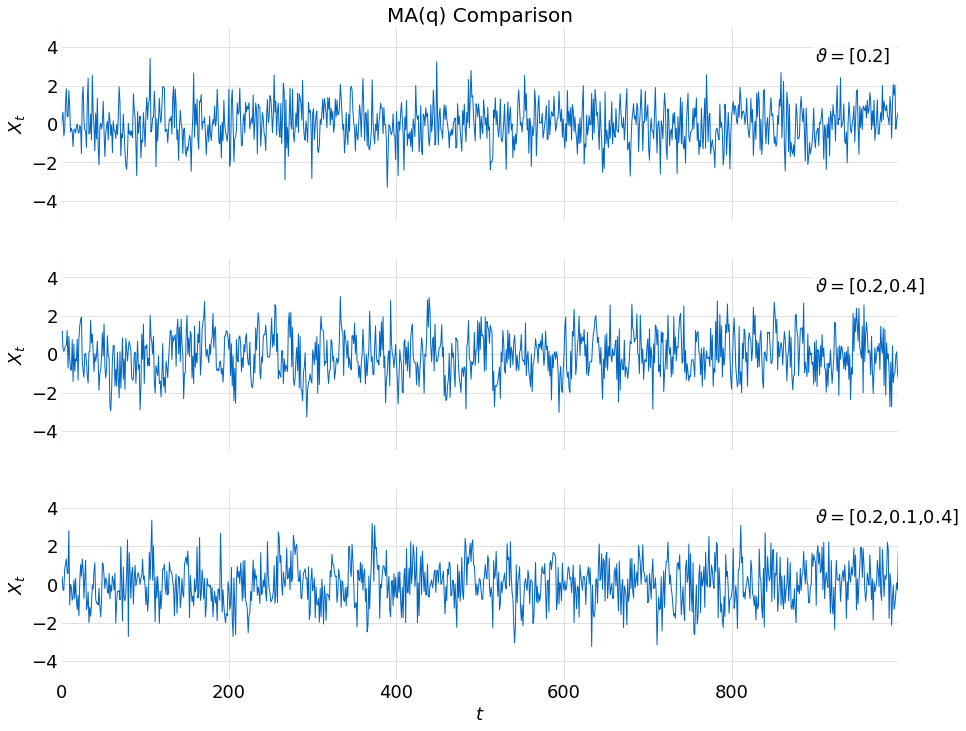

In [14]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = numpy.array([ma1, ma2, ma3])
plots.stack(samples, [-5.0, 5.0], labels, title)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = 0.2$

In [15]:
results = arima.ma_estimate(ma1, 1)
results.polynomial_ma, results.bse

(array([1.        , 0.20666344]), array([0.03825522, 0.03166763, 0.04457289]))

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1421.000
Date:                Sun, 20 Mar 2022   AIC                           2848.000
Time:                        14:25:50   BIC                           2862.724
Sample:                             0   HQIC                          2853.596
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0156      0.038      0.408      0.683      -0.059       0.091
ma.L1          0.2067      0.032      6.526      0.000       0.145       0.269
sigma2         1.0041      0.045     22.527      0.000       0.917       1.091
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.88   Prob(JB):                         0.91
Heteroskedasticity (H):               0.97   Skew:                            -0.03
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(2)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = [0.2, 0.4]$

In [17]:
results = arima.ma_estimate(ma2, 2)
results.polynomial_ma, results.bse

(array([1.        , 0.2586178 , 0.40315241]),
 array([0.05321185, 0.02942945, 0.03108858, 0.04872466]))

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1431.490
Date:                Sun, 20 Mar 2022   AIC                           2870.981
Time:                        14:25:50   BIC                           2890.612
Sample:                             0   HQIC                          2878.442
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0438      0.053     -0.822      0.411      -0.148       0.061
ma.L1          0.2586      0.029      8.788      0.000       0.201       0.316
ma.L2          0.4032      0.031     12.968      0.000       0.342       0.464
sigma2         1.0250      0.049     21.037      0.000       0.930       1.121
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.60
Prob(Q):                              0.92   Prob(JB):                         0.27
Heteroskedasticity (H):               1.06   Skew:                             0.05
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(3)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = [0.2, 0.4, 0.5]$

In [19]:
results = arima.ma_estimate(ma3, 3)
results.polynomial_ma, results.bse

(array([1.        , 0.18595583, 0.14264311, 0.41734047]),
 array([0.05428603, 0.02900466, 0.02965483, 0.02859904, 0.04279373]))

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1401.090
Date:                Sun, 20 Mar 2022   AIC                           2812.180
Time:                        14:25:51   BIC                           2836.719
Sample:                             0   HQIC                          2821.507
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0383      0.054      0.705      0.481      -0.068       0.145
ma.L1          0.1860      0.029      6.411      0.000       0.129       0.243
ma.L2          0.1426      0.030      4.810      0.000       0.085       0.201
ma.L3          0.4173      0.029     14.593      0.000       0.361       0.473
sigma2         0.9643      0.043     22.535      0.000       0.880       1.048
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.30
Prob(Q):                              0.72   Prob(JB):                         0.86
Heteroskedasticity (H):               1.29   Skew:                             0.04
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""